In [ ]:
from lcd import CDModelDelegator
from PIL import Image
import torch

In [2]:
cd_model = CDModelDelegator.create_cd_llava_model()

prompt = "USER:\n<image>Describe this image in detail.\nASSISTANT:"
image = Image.open('man_bear.jpeg').convert("RGB")

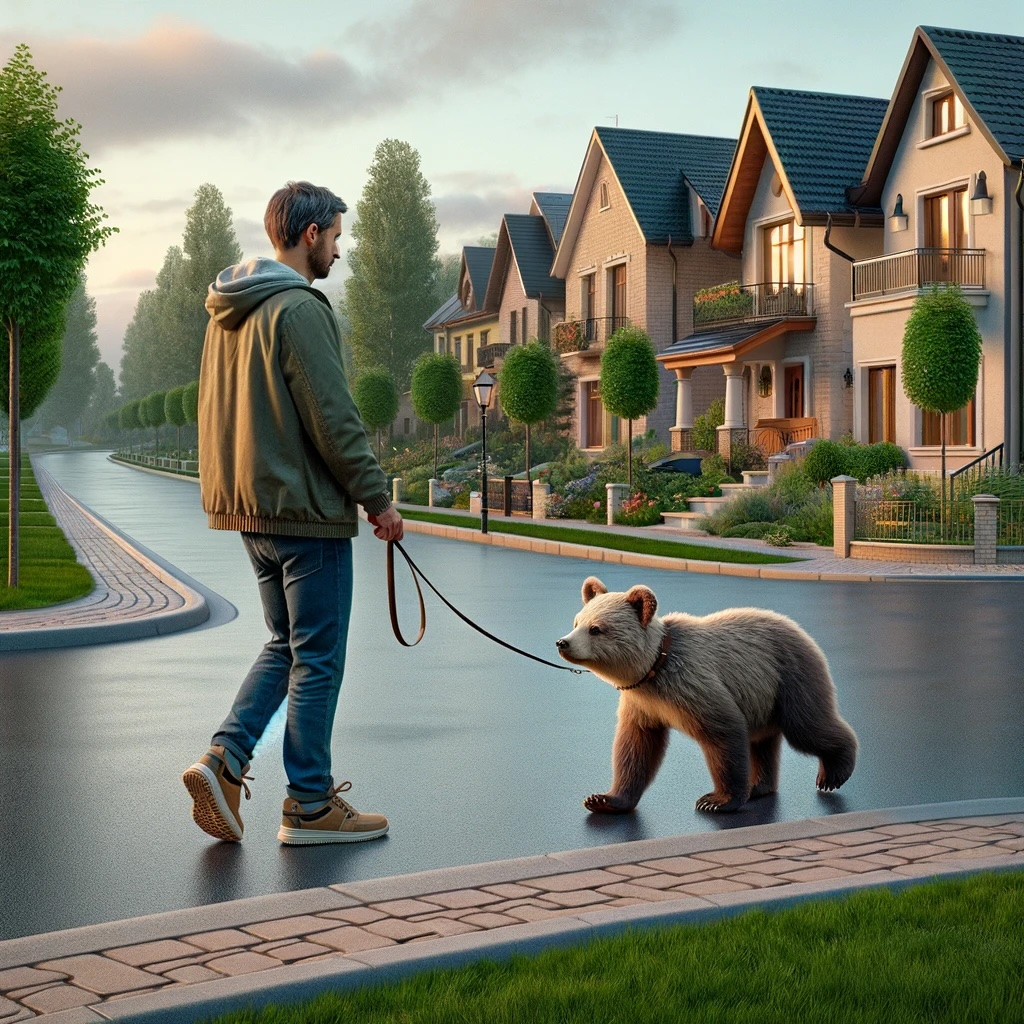

In [3]:
image

## Generate with LCD

In [10]:
inputs = cd_model.processor(images=image,
                                    text=prompt,
                                    return_tensors="pt").to(cd_model.model.device)

with torch.inference_mode():
            outputs = cd_model.generate(
                **inputs,
                do_sample=True,
                temperature=1.0,
                max_new_tokens=200,
                min_new_tokens=1
            )

print(cd_model.processor.batch_decode(outputs, skip_special_tokens=True)[0].strip())

USER:
 Describe this image in detail.
ASSISTANT: In this animated scene, a man is walking a brown bear on a leash down the middle of the street. The man appears to be the focal point in the image, while the brown bear accompanies him closely. 

Around the street, several potted plants can be spotted, adding a touch of greenery to the urban environment. There are also multiple benches in the area, providing seating options for pedestrians and passers-by.


## Generate without LCD

In [16]:
with torch.inference_mode():
            outputs = cd_model.model.generate(
                **inputs,
                do_sample=True,
                temperature=1.0,
                max_new_tokens=200,
                min_new_tokens=1
            )

print(cd_model.processor.batch_decode(outputs, skip_special_tokens=True)[0].strip())

USER:
 Describe this image in detail.
ASSISTANT: The image showcases a scene where a man is walking down a street with a dog on a leash. The man and the dog share the street with other vehicles, including a truck in the background on the left-hand side and two more trucks located further down the street. The street also features several potted plants that are scattered along the sidewalks, adding some greenery to the urban environment.

Furthermore, there is another person walking nearby, possibly a pedestrian walking along the same stretch of the road.
